In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error



In [5]:
print("Loading dataset...")
data = pd.read_csv('/content/drive/MyDrive/weather-automated-sensors-dataset.csv')
print("Dataset loaded successfully.")

Loading dataset...
Dataset loaded successfully.


In [6]:
print("\nThe Complete Dataset:")
display(data.describe())


The Complete Dataset:


,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
count,59066.000000,38843.000000,59141.000000,38843.000000,59141.000000,38843.000000,38843.000000,59141.000000,59141.000000,59141.000000,58995.000000,59141.000000,38843.000000,59141.000000
mean,13.282062,10.643001,69.464517,0.187591,0.175327,185.445529,4.651932,178.980132,2.969908,4.484584,993.718263,108.490421,186.236877,13.055144
std,9.945331,8.965170,15.714691,1.962149,1.300946,231.579782,16.168542,108.124898,6.138399,6.451704,7.044515,211.497272,176.452547,1.485712
min,-19.890000,-20.100000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,964.400000,-6.000000,0.000000,11.600000
25%,5.500000,4.000000,59.000000,0.000000,0.000000,14.900000,0.000000,86.000000,1.400000,2.400000,989.500000,0.000000,1.000000,11.900000
50%,14.900000,12.100000,71.000000,0.000000,0.000000,69.800000,0.000000,196.000000,2.500000,3.800000,993.900000,3.000000,353.000000,12.100000
75%,21.500000,18.100000,82.000000,0.000000,0.000000,279.500000,0.000000,271.000000,4.000000,5.900000,998.100000,96.000000,354.000000,15.100000
max,34.100000,28.400000,100.000000,183.600000,63.420000,1056.100000,70.000000,359.000000,999.900000,999.900000,1019.500000,1277.000000,359.000000,15.300000


from matplotlib import pyplot as plt
_df_0['Air Temperature'].plot(kind='hist', bins=20, title='Air Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Wet Bulb Temperature'].plot(kind='hist', bins=20, title='Wet Bulb Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Humidity'].plot(kind='hist', bins=20, title='Humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Rain Intensity'].plot(kind='hist', bins=20, title='Rain Intensity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Air Temperature', y='Wet Bulb Temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Wet Bulb Temperature', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Humidity', y='Rain Intensity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Rain Intensity', y='Interval Rain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Air Temperature'].plot(kind='line', figsize=(8, 4), title='Air Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Wet Bulb Temperature'].plot(kind='line', figsize=(8, 4), title='Wet Bulb Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Humidity'].plot(kind='line', figsize=(8, 4), title='Humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Rain Intensity'].plot(kind='line', figsize=(8, 4), title='Rain Intensity')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Air Temperature', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Wet Bulb Temperature', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Humidity', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Rain Intensity', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
print("\nDataset Structure:")
display(data.head())


Dataset Structure:


,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,Oak Street Weather Station,05/22/2015 03:00:00 PM,NaN,7.0,55.0,0.0,0.0,1.4,0.0,63.0,1.9,2.8,NaN,780.0,322.0,12.0,05/22/2015 3:00 PM,OakStreetWeatherStation201505221500
1,Oak Street Weather Station,05/22/2015 05:00:00 PM,NaN,6.3,56.0,0.0,0.0,1.4,0.0,124.0,1.5,2.3,NaN,180.0,322.0,12.1,05/22/2015 5:00 PM,OakStreetWeatherStation201505221700
2,Oak Street Weather Station,05/22/2015 06:00:00 PM,NaN,6.5,54.0,0.0,0.0,1.4,0.0,156.0,1.9,3.4,NaN,127.0,322.0,12.1,05/22/2015 6:00 PM,OakStreetWeatherStation201505221800
3,Oak Street Weather Station,05/22/2015 07:00:00 PM,NaN,6.3,53.0,0.0,0.0,1.4,0.0,150.0,1.4,4.5,NaN,67.0,322.0,12.1,05/22/2015 7:00 PM,OakStreetWeatherStation201505221900
4,Oak Street Weather Station,05/22/2015 08:00:00 PM,NaN,6.4,52.0,0.0,0.0,1.4,0.0,155.0,1.1,2.3,NaN,10.0,322.0,12.0,05/22/2015 8:00 PM,OakStreetWeatherStation201505222000


In [8]:
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(59144, 18)


In [9]:
print("\nInformation about dataset columns, types, and missing values:")
print(data.info())


Information about dataset columns, types, and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59144 entries, 0 to 59143
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 59144 non-null  object 
 1   Measurement Timestamp        59141 non-null  object 
 2   Air Temperature              59066 non-null  float64
 3   Wet Bulb Temperature         38843 non-null  float64
 4   Humidity                     59141 non-null  float64
 5   Rain Intensity               38843 non-null  float64
 6   Interval Rain                59141 non-null  float64
 7   Total Rain                   38843 non-null  float64
 8   Precipitation Type           38843 non-null  float64
 9   Wind Direction               59141 non-null  float64
 10  Wind Speed                   59141 non-null  float64
 11  Maximum Wind Speed           59141 non-null  float64
 12  Barometric 

In [10]:
print("\nSummary Statistics of Numerical Features:")
display(data.describe())


Summary Statistics of Numerical Features:


,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
count,59066.000000,38843.000000,59141.000000,38843.000000,59141.000000,38843.000000,38843.000000,59141.000000,59141.000000,59141.000000,58995.000000,59141.000000,38843.000000,59141.000000
mean,13.282062,10.643001,69.464517,0.187591,0.175327,185.445529,4.651932,178.980132,2.969908,4.484584,993.718263,108.490421,186.236877,13.055144
std,9.945331,8.965170,15.714691,1.962149,1.300946,231.579782,16.168542,108.124898,6.138399,6.451704,7.044515,211.497272,176.452547,1.485712
min,-19.890000,-20.100000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,964.400000,-6.000000,0.000000,11.600000
25%,5.500000,4.000000,59.000000,0.000000,0.000000,14.900000,0.000000,86.000000,1.400000,2.400000,989.500000,0.000000,1.000000,11.900000
50%,14.900000,12.100000,71.000000,0.000000,0.000000,69.800000,0.000000,196.000000,2.500000,3.800000,993.900000,3.000000,353.000000,12.100000
75%,21.500000,18.100000,82.000000,0.000000,0.000000,279.500000,0.000000,271.000000,4.000000,5.900000,998.100000,96.000000,354.000000,15.100000
max,34.100000,28.400000,100.000000,183.600000,63.420000,1056.100000,70.000000,359.000000,999.900000,999.900000,1019.500000,1277.000000,359.000000,15.300000


In [11]:
print("\nChecking for Missing Values in Each Column:")
missing_values = data.isnull().sum()
print(missing_values)


Checking for Missing Values in Each Column:
Station Name                       0
Measurement Timestamp              3
Air Temperature                   78
Wet Bulb Temperature           20301
Humidity                           3
Rain Intensity                 20301
Interval Rain                      3
Total Rain                     20301
Precipitation Type             20301
Wind Direction                     3
Wind Speed                         3
Maximum Wind Speed                 3
Barometric Pressure              149
Solar Radiation                    3
Heading                        20301
Battery Life                       3
Measurement Timestamp Label        3
Measurement ID                     0
dtype: int64


In [12]:
print("\nDropping rows with missing values...")
data = data.dropna()
print(f"Shape after dropping missing values: {data.shape}")


Dropping rows with missing values...
Shape after dropping missing values: (38768, 18)


In [13]:
print("\nData Types in the Dataset:")
print(data.dtypes)


Data Types in the Dataset:
Station Name                    object
Measurement Timestamp           object
Air Temperature                float64
Wet Bulb Temperature           float64
Humidity                       float64
Rain Intensity                 float64
Interval Rain                  float64
Total Rain                     float64
Precipitation Type             float64
Wind Direction                 float64
Wind Speed                     float64
Maximum Wind Speed             float64
Barometric Pressure            float64
Solar Radiation                float64
Heading                        float64
Battery Life                   float64
Measurement Timestamp Label     object
Measurement ID                  object
dtype: object


In [14]:
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in {col}: {data[col].unique()}")


Unique values in Station Name: ['Oak Street Weather Station' '63rd Street Weather Station']

Unique values in Measurement Timestamp: ['05/26/2015 02:00:00 PM' '05/26/2015 03:00:00 PM'
 '05/26/2015 04:00:00 PM' ... '11/07/2017 11:00:00 PM'
 '11/08/2017 12:00:00 AM' '11/08/2017 01:00:00 AM']

Unique values in Measurement Timestamp Label: ['05/26/2015 2:00 PM' '05/26/2015 3:00 PM' '05/26/2015 4:00 PM' ...
 '11/07/2017 11:00 PM' '11/08/2017 12:00 AM' '11/08/2017 1:00 AM']

Unique values in Measurement ID: ['OakStreetWeatherStation201505261400'
 'OakStreetWeatherStation201505261500'
 'OakStreetWeatherStation201505261600' ...
 'OakStreetWeatherStation201711082400'
 '63rdStreetWeatherStation201711080100'
 'OakStreetWeatherStation201711080100']


In [15]:
print("\nCorrelation of features with 'Air Temperature':")
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()['Air Temperature'].sort_values(ascending=False)
print(correlation)



Correlation of features with 'Air Temperature':
Air Temperature         1.000000
Wet Bulb Temperature    0.978970
Total Rain              0.443262
Solar Radiation         0.253761
Battery Life            0.202054
Interval Rain           0.013496
Rain Intensity         -0.000289
Precipitation Type     -0.028707
Heading                -0.046245
Humidity               -0.060252
Wind Speed             -0.074604
Maximum Wind Speed     -0.090670
Wind Direction         -0.137454
Barometric Pressure    -0.212933
Name: Air Temperature, dtype: float64


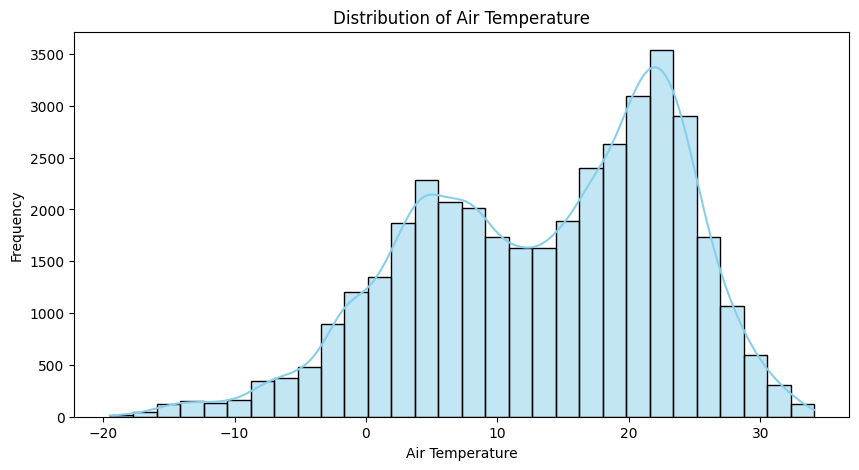

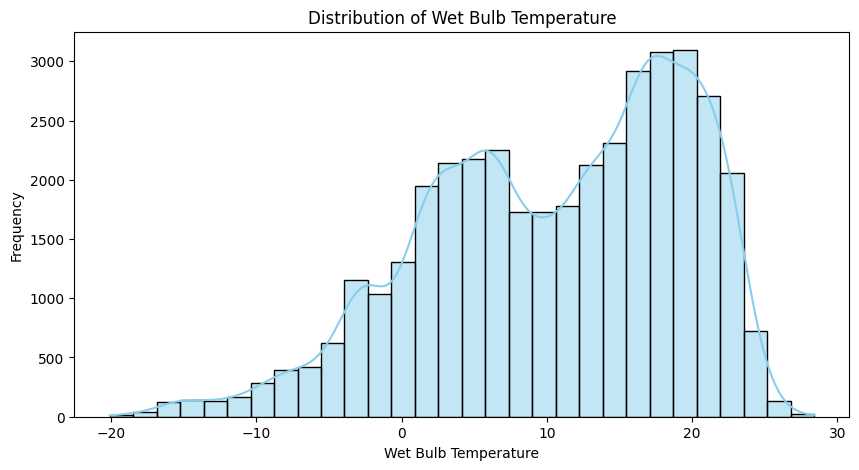

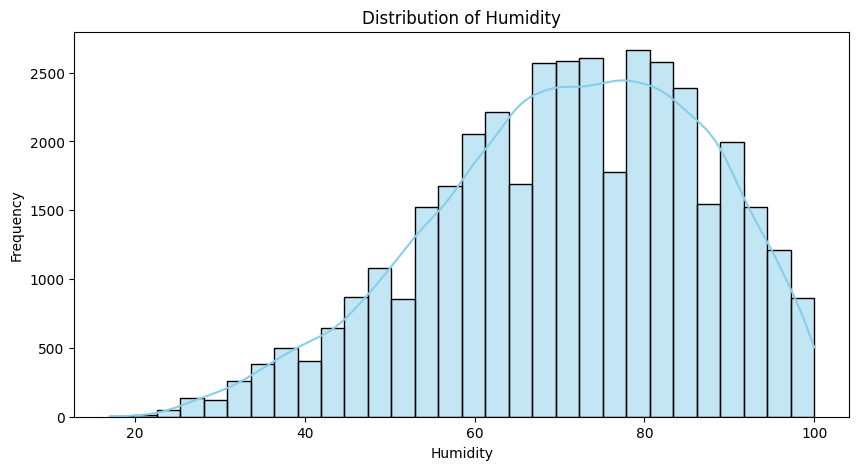

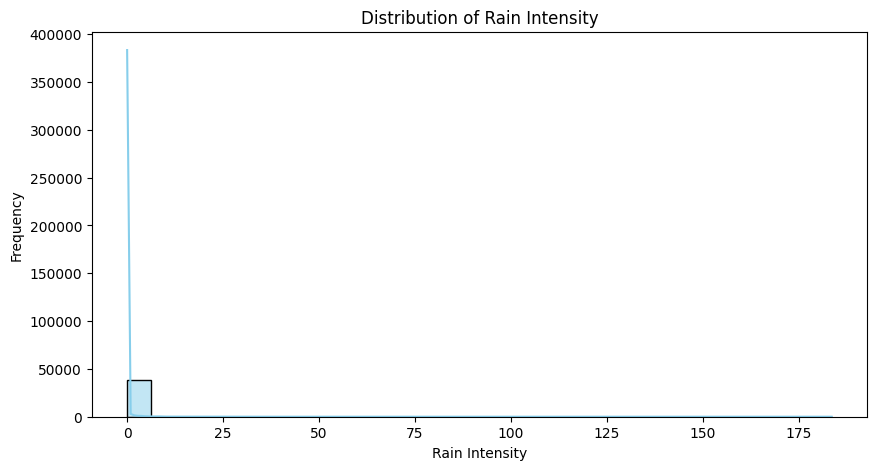

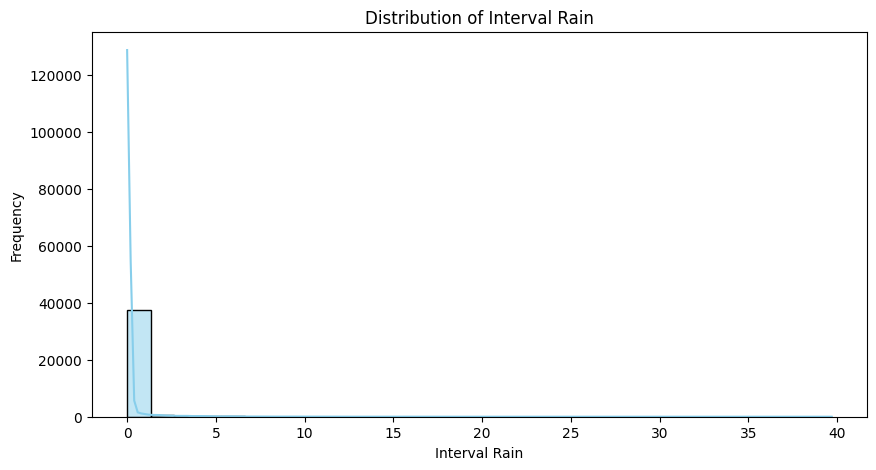

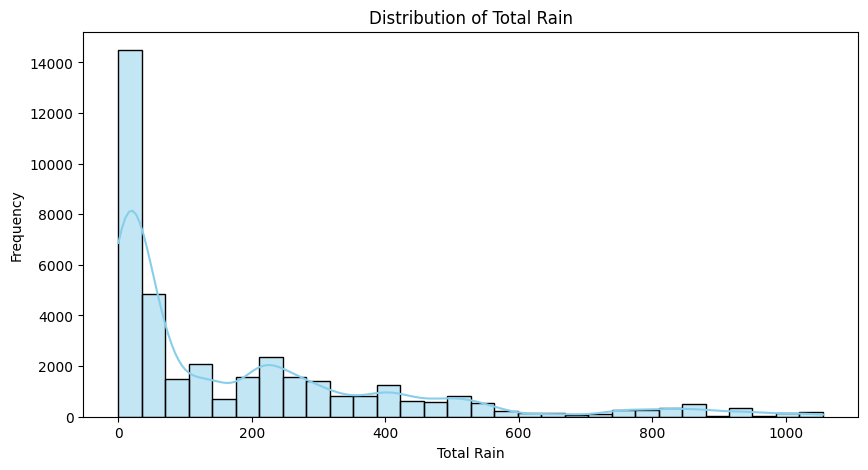

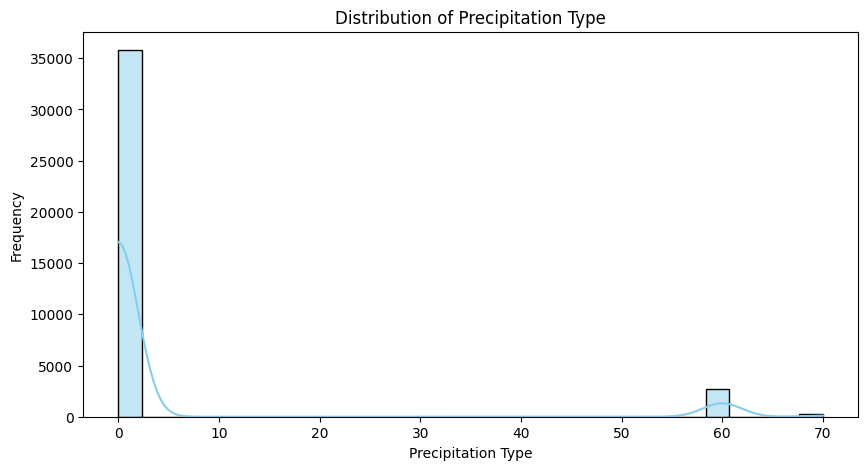

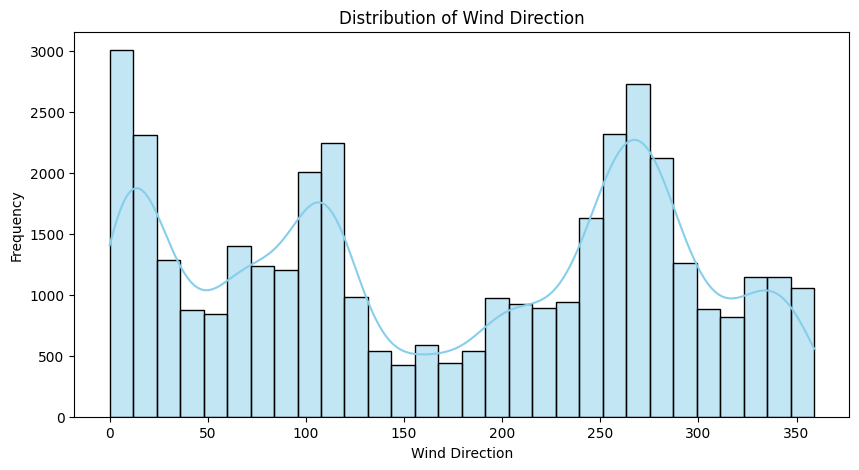

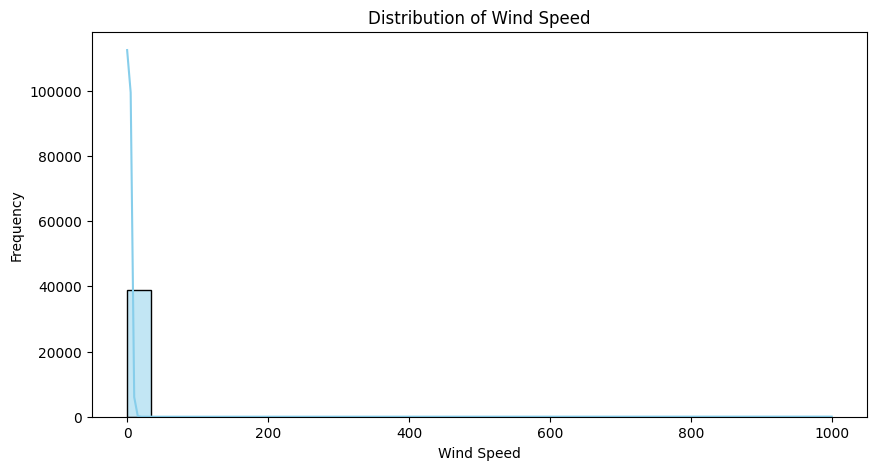

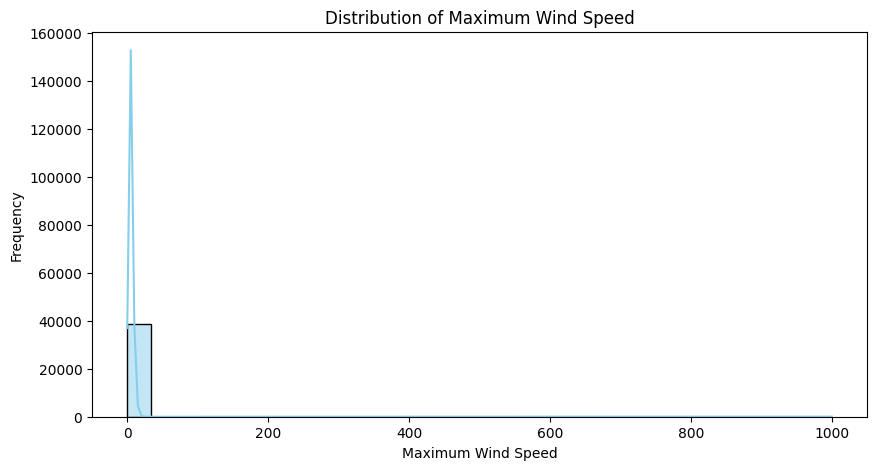

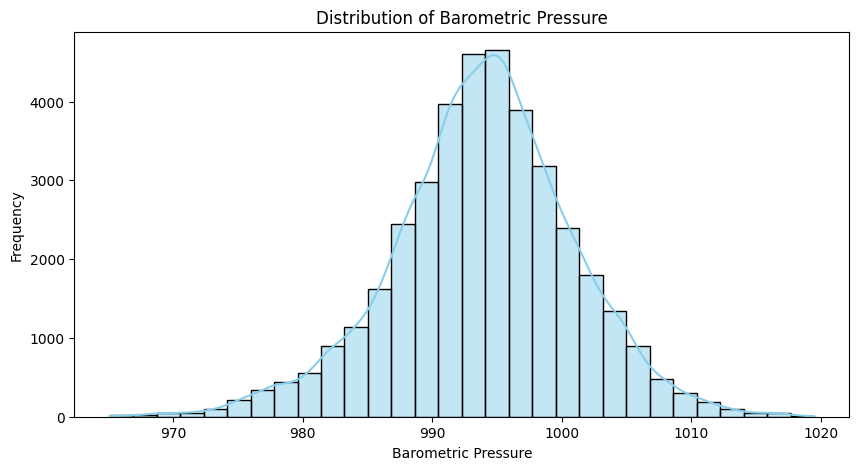

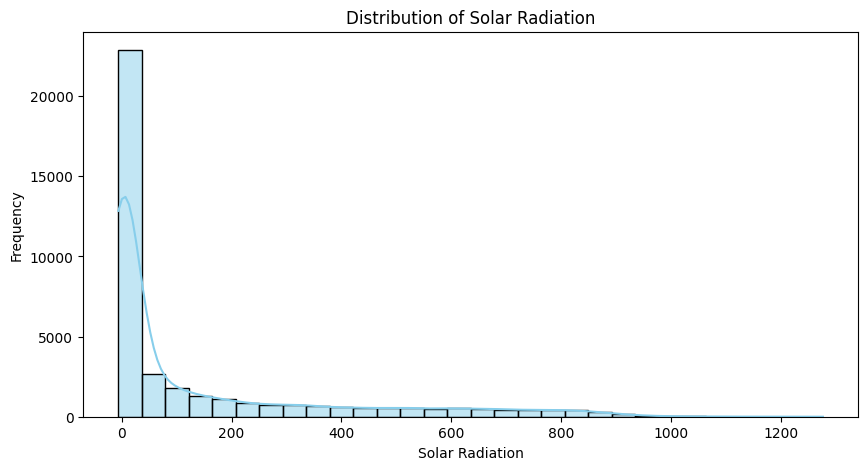

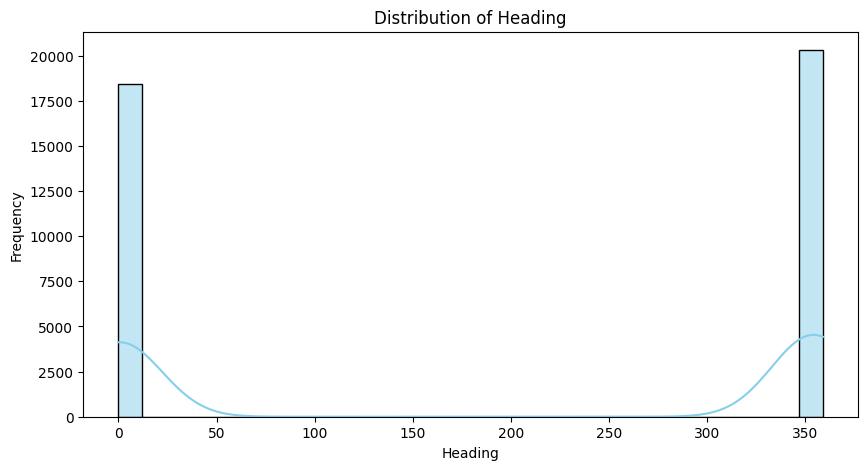

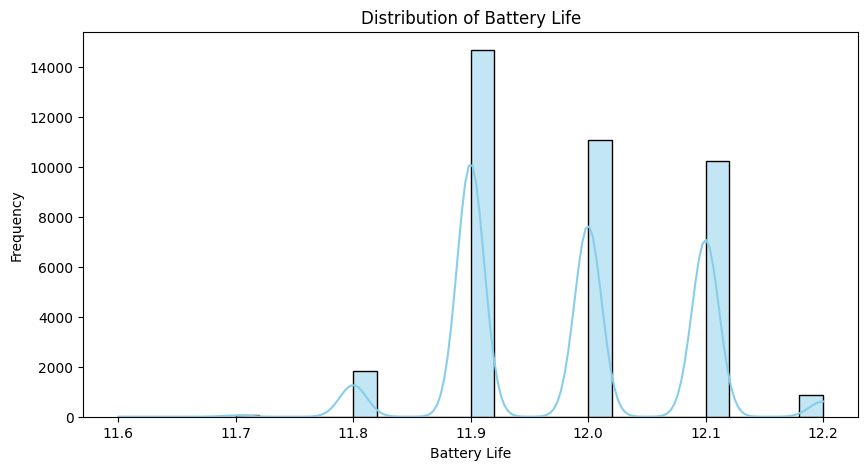

In [16]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



Generating pairplot of numerical features for insight...


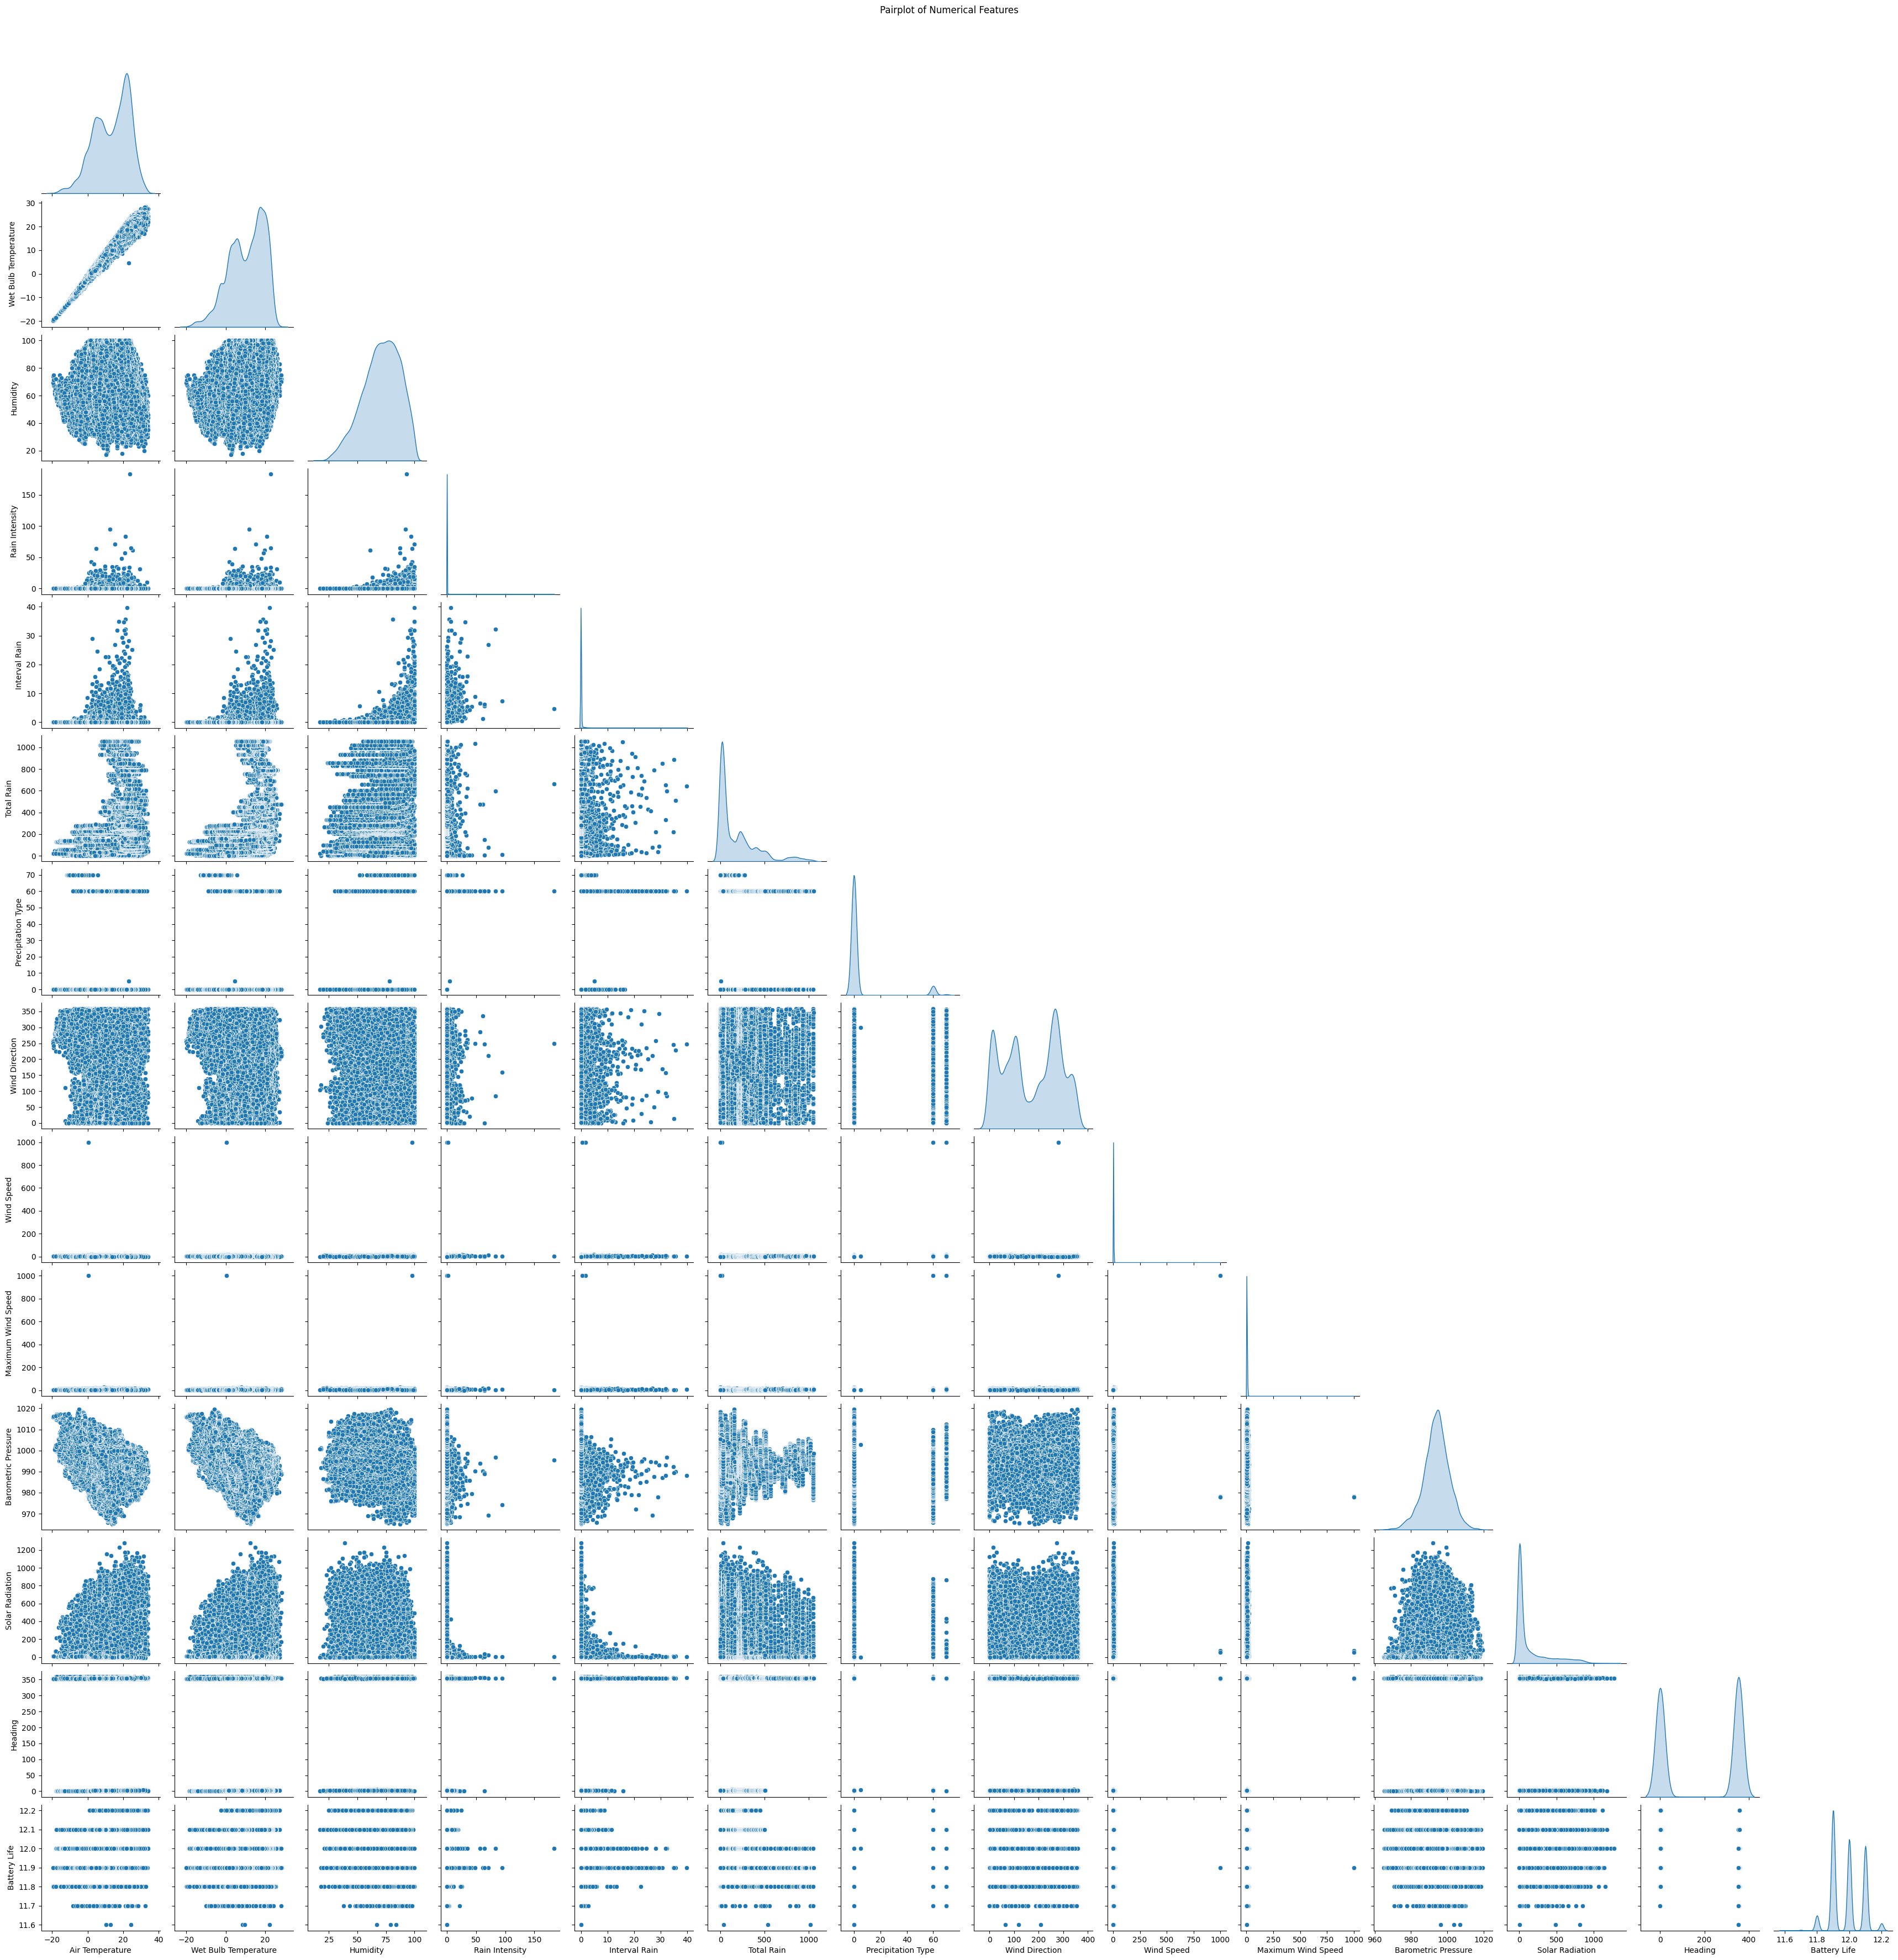

In [17]:
print("\nGenerating pairplot of numerical features for insight...")
sns.pairplot(data[numeric_columns], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

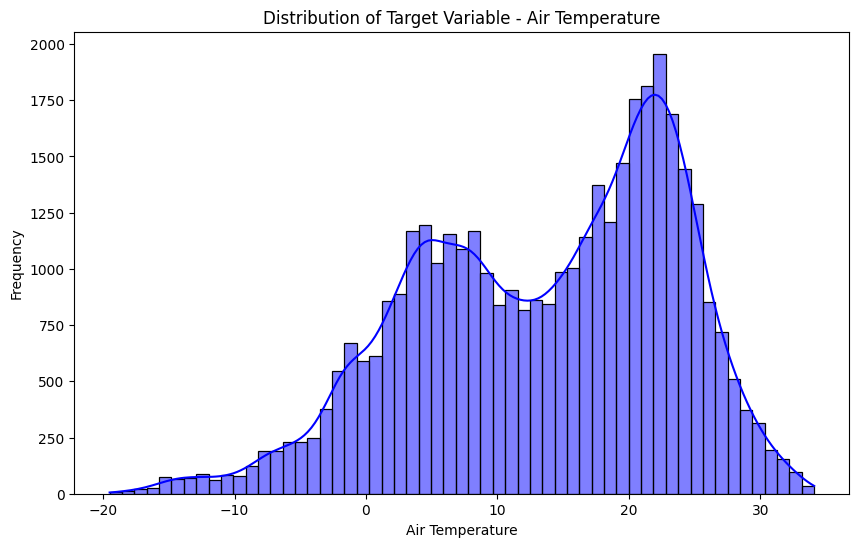

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Air Temperature'], kde=True, color='blue')
plt.title("Distribution of Target Variable - Air Temperature")
plt.xlabel("Air Temperature")
plt.ylabel("Frequency")
plt.show()


In [19]:
print("\nSeparating features from the target variable 'Air Temperature'...")
features = data.drop(columns=['Station Name', 'Measurement Timestamp', 'Measurement Timestamp Label', 'Measurement ID', 'Air Temperature'])
target = data['Air Temperature']
print("Separation completed.")



Separating features from the target variable 'Air Temperature'...
Separation completed.


In [20]:
print("\nSplitting the data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Splitting the data into training and testing sets...
Training Set Shape: (31014, 13)
Testing Set Shape: (7754, 13)


In [21]:
print("\nApplying Standard Scaling to features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling completed.")


Applying Standard Scaling to features...
Scaling completed.


In [22]:
print("\nConfiguring the neural network model...")
model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=42, learning_rate='adaptive')
print("Model configured with hidden layers and learning rate adjustments.")



Configuring the neural network model...
Model configured with hidden layers and learning rate adjustments.


In [23]:
print("\nTraining the neural network model on the training data...")
model.fit(X_train_scaled, y_train)
print("Model training completed.")



Training the neural network model on the training data...
Model training completed.


In [24]:
print("\nMaking predictions on the test set...")
y_pred = model.predict(X_test_scaled)
print("Predictions complete.")



Making predictions on the test set...
Predictions complete.


In [28]:
print("\nCalculating model performance metrics...")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
variance_score = explained_variance_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Root Mean Squared Error (EMSE): {rmse:.6f}")
print(f"Mean Absolute Error: {mae:.6f}")
print(f"variance Score: {variance_score:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.6f}")




Calculating model performance metrics...
Mean Squared Error (MSE): 0.019964
R^2 Score: 0.9998
Root Mean Squared Error (EMSE): 0.141292
Mean Absolute Error: 0.104371
variance Score: 0.999828
Mean Absolute Percentage Error (MAPE): 1030945655387.054443


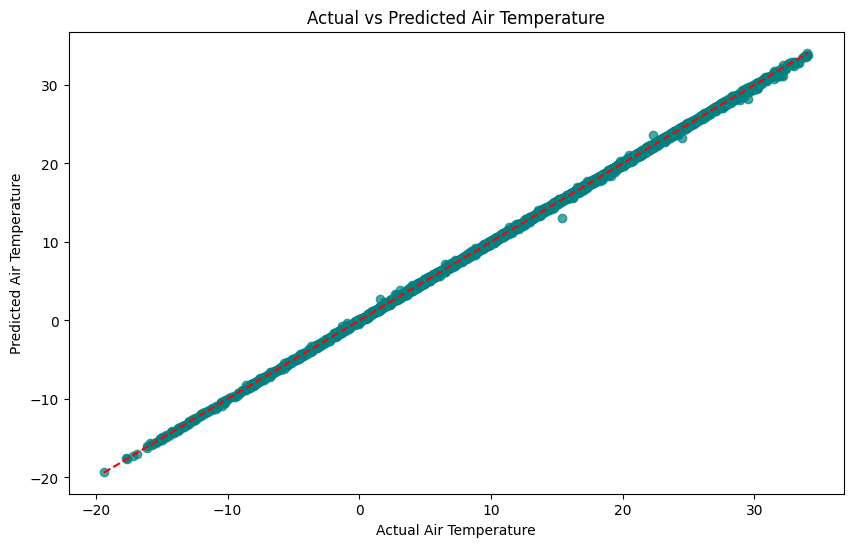

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Air Temperature")
plt.xlabel("Actual Air Temperature")
plt.ylabel("Predicted Air Temperature")
plt.show()

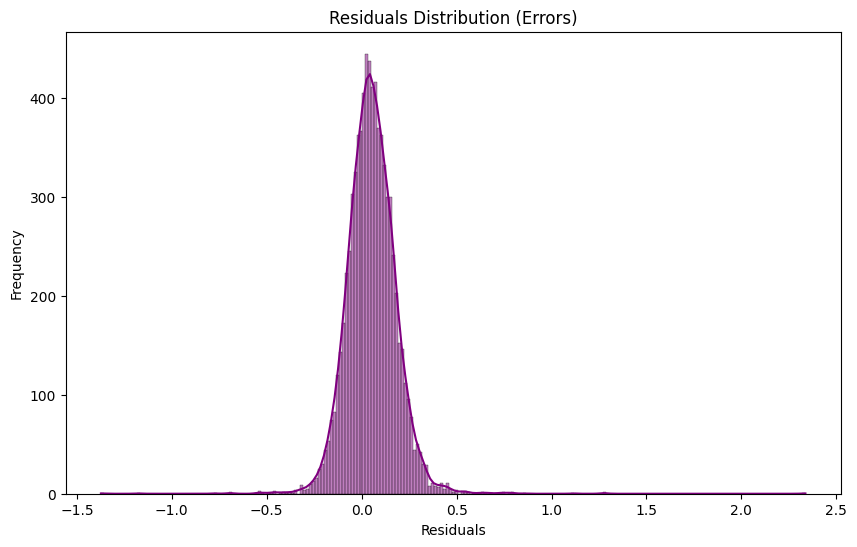

In [30]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution (Errors)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


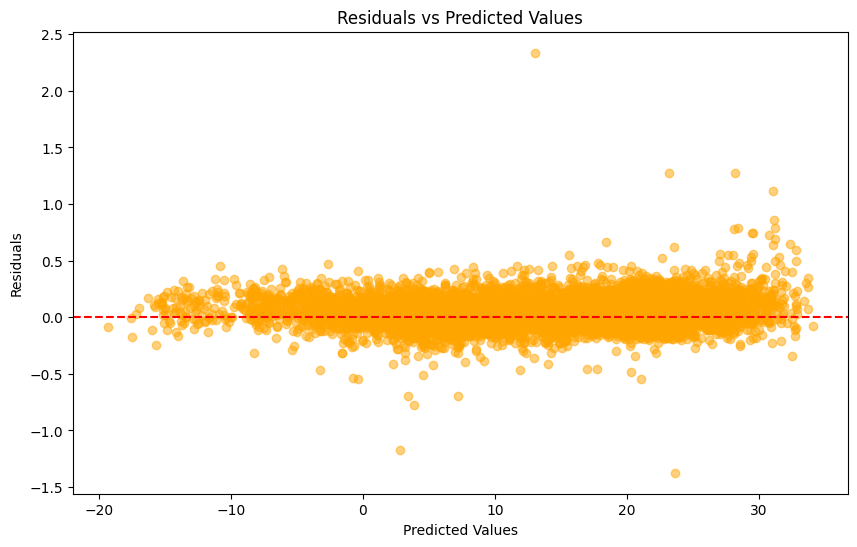

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [32]:
print("\nModel Performance Analysis:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R^2 Score: {r2:.4f}")
if r2 > 0.9:
    print("The R^2 score suggests the model has a strong predictive performance.")
else:
    print("The R^2 score suggests room for improvement.")


Model Performance Analysis:
Mean Squared Error (MSE): 0.019964
R^2 Score: 0.9998
The R^2 score suggests the model has a strong predictive performance.


In [34]:
print("\nModel Hyperparameters and Summary:")
print(f"Hidden Layers: {model.hidden_layer_sizes}")
print(f"Max Iterations: {model.max_iter}")
print(f"Learning Rate: {model.learning_rate}")
print("\nFinal Model Performance:")
print(f"- MSE: {mse:.6f}")
print(f"- R^2 Score: {r2:.4f}")
print(f"Root Mean Squared Error (EMSE): {rmse:.6f}")
print(f"Mean Absolute Error: {mae:.6f}")
print(f"variance Score: {variance_score:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.6f}")
print("Modeling process completed with detailed evaluation.")


Model Hyperparameters and Summary:
Hidden Layers: (128, 64, 32)
Max Iterations: 500
Learning Rate: adaptive

Final Model Performance:
- MSE: 0.019964
- R^2 Score: 0.9998
Root Mean Squared Error (EMSE): 0.141292
Mean Absolute Error: 0.104371
variance Score: 0.999828
Mean Absolute Percentage Error (MAPE): 1030945655387.054443
Modeling process completed with detailed evaluation.
